# 数据科学与工程导论-期末大作业
温兆和 10205501432

在城市化进程逐步加快的今天，车祸的发生次数越来越多，甚至还夺去了不少人的生命。但是，由于城市的拥堵，交警部门和救援人员有时无法第一时间赶到现场，也难以预判车祸的严重程度并由此提前制定策略。但是，车祸发生时的外在因素以及发生后造成的伤亡等往往比较容易提前获知，也与车祸的严重程度有一定程度上的关联。所以，我们可以建立一个模型，通过车祸发生时的外在因素以及发生后造成的伤亡等信息来预测车祸的严重程度。

在kaggle上有一个名叫UK Road Traffic Collision Dataset的数据集，其中的accident_data.csv表包含了2005-2010年间英国境内的所有车祸及其相关信息。其中：
- Accident_Index表示该起事故的编号
- 1st_Road_Class表示该起事故发生的第一条马路的类别，主要分为A、B、C、Motorway、A(M)五类
- 1st_Road_Number表示该起事故发生的第一条马路的号码
- 2nd_Road_Class表示该起事故发生的第二条马路的类别，其中大部分事故没有第二条马路
- 2nd_Road_Number表示该起事故发生的第二条马路的号码
- Accident_Severity表示事故的严重程度，分为Serious、Slight和Fatal三类
- Carriageway_Hazards表示事故发生时路上有没有什么危险因素，如果有就写具体的危险因素，没有就写None
- Date表示事故发生的日期
- Day_of_Week表示事故发生在星期几
- Did_Police_Officer_Attend_Scene_of_Accident表示事故发生后有没有警察的介入，1表示警察介入了，2表示警察没介入，3表示报警之前事故就已经妥善解决了
- Junction_Control表示事发路口有没有维持交通秩序的设施，主要分为Give way or uncontrolled（没有控制）和Auto traffic signal（有信号灯）等
- Junction_Detail表示路口的类型，主要分为Not at junction or within 20 metres（不是路口或距离路口二十米），T or staggered junction（丁字路口或交错接口）和Crossroads（十字路口）
- Latitude表示事故发生处的纬度
- Light_Conditions表示事故发生处的光照条件
- Local_Authority_(District)表示事故发生处所处的行政区
- Local_Authority_(Highway)表示事故发生的公路归哪个行政区管辖
- Location_Easting_OSGR表示事故发生处的东西坐标
- Location_Northing_OSGR表示事故发生处的南北坐标
- Longitude表示事故发生处的经度
- LSOA_of_Accident_Location表示Lower Layer Super Output Area of accident
- Number_of_Casualties表示死亡人数
- Number_of_Vehicles表示车祸涉及到的车辆数
- Pedestrian_Crossing-Human_Control表示指挥过往行人的人员数目
- Pedestrian_Crossing-Physical_Facilities表示指挥过往行人的交通设施数目
- Police_Force表示负责这起事故的警察机构是哪一个
- Road_Surface_Conditions表示事故发生时的路面情况，主要分为Dry和Wet or damp
- Road_Type表示事故发生的路段的类型，主要分为Single carriageway（向）、Dual carriageway（双向）和One way street（单行道）等
- Special_Conditions_at_Site表示路面上可能导致事故发生的其他因素
- Speed_limit表示事故发生路段的限速
- Time表示事故发生的时间
- Urban_or_Rural_Area表示事故是发生在城市还是发生在农村
- Weather_Conditions表示事故发生时的天气情况，主要分为Fine no high winds（天气好，无风）和Raining no high winds（下雨，无风）等
- Year表示事故发生的年份
- InScotland表示事故是否发生在Scotland

可见，这个表中的数据比较完整地记录了车祸发生时的各种外在因素。所以，我们可以用这个数据集来探索外在因素对车祸严重程度的影响。根据数据科学的一般过程，我们将先对这个数据集进行预处理，补全各种不完整的信息并删去重复项。然后对数据进行分析与可视化，由此来体现各个因素对车祸严重程度的影响有多大，并由此分析原因、得出结论。最后，我们将在对数据集进行进一步处理后将新的数据集分为训练集和测试集两个部分，用训练集中的数据建立模型用以从外在因素预测车祸严重程度，并在测试集上测试模型的准确性。

下面是这个大作业所要用到的Python库。

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

## I.数据集的预处理
接下来，我们就要对数据集进行预处理了。首先，我们打开这个数据集：

In [2]:
Data = pd.read_csv("accident_data.csv")
print(len(Data))
Data.head()

1048575


,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


可见，这个数据集共有一百多万条车祸的信息。接着，我们把一些与车祸严重程度本身关系不大的特征。事故编号、马路编号、事发地的行政区、归哪个警察局管都与车祸严重程度无关，删除；由于很多车祸并没有发生在路口，所以缺失这个特征的信息，我们直接把它删除；像东西坐标、经纬度、是否在Scotland等特征都表征车祸发生的地理位置。我们只保留最精确的经纬度。

In [3]:
Data1 = Data.drop(labels=['Accident_Index','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Local_Authority_(District)','Local_Authority_(Highway)','Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','Police_Force','InScotland'], axis =1) 
Data1.head()

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,A,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,NaN,...,0.0,1.0,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005
1,B,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,0.0,5.0,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005
2,C,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,...,0.0,0.0,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005
3,A,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,...,0.0,0.0,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005
4,NaN,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,...,0.0,0.0,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005


现在我们就可以对数据集进行清洗了。首先，我们剔除数据集中不完整的数据行。

In [4]:
Data2 = Data1.dropna()
print(len(Data2))

724313


然后剔除重复的行：

In [5]:
Data3 = Data2.drop_duplicates()
Data3 = Data3.reset_index()
Data3 = Data3.drop(labels = ['index'],axis=1)
print(len(Data3))
Data3.head()

724296


,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,B,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,0.0,5.0,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005
1,C,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,...,0.0,0.0,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005
2,C,Slight,None,13/01/2005,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,...,0.0,0.0,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005
3,A,Slight,None,15/01/2005,Saturday,1.0,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,...,0.0,5.0,Dry,Single carriageway,None,30,22:43,Urban,Fine no high winds,2005
4,A,Slight,None,16/01/2005,Sunday,1.0,Auto traffic signal,Crossroads,51.494902,Darkness - lights lit,...,0.0,5.0,Dry,Single carriageway,None,30,00:42,Urban,Fine no high winds,2005


现在数据集中没有哪一个数据是空白的，也没有那两行是重复的了。接下去，我们再对某些特征的取值范围进行探索。

In [6]:
#Carriageway_Hazards
def HasIndex(A,x):
    for i in range(len(A)):
        if (A[i]==x):
            return 1
            break
    return 0
Car_Ha=[]
for i in range(len(Data3)):
    if HasIndex(Car_Ha,Data3['Carriageway_Hazards'][i])==0:
        Car_Ha.append(Data3['Carriageway_Hazards'][i])
print(Car_Ha)

['None', 'Other object on road', 'Previous accident', 'Any animal in carriageway (except ridden horse)', 'Vehicle load on road', 'Pedestrian in carriageway - not injured']


可见，Carriageway_Hazards这个特征就有'None','Other object on road', 'Previous accident', 'Any animal in carriageway (except ridden horse)', 'Vehicle load on road', 'Pedestrian in carriageway - not injured'这五个可能的取值。我们再用同样的方法求出其它特征的取值范围。

In [7]:
#1st_Road_Class
One_Rd_Cl=[]
for i in range(len(Data3)):
    if HasIndex(One_Rd_Cl,Data3['1st_Road_Class'][i])==0:
        One_Rd_Cl.append(Data3['1st_Road_Class'][i])
print(One_Rd_Cl)

['B', 'C', 'A', 'Motorway', 'A(M)']


In [8]:
#Accident_Severity
Acci_Seve=[]
for i in range(len(Data3)):
    if HasIndex(Acci_Seve,Data3['Accident_Severity'][i])==0:
        Acci_Seve.append(Data3['Accident_Severity'][i])
print(Acci_Seve)

['Slight', 'Serious', 'Fatal']


In [9]:
#Day_of_Week
D_o_w=[]
for i in range(len(Data3)):
    if HasIndex(D_o_w,Data3['Day_of_Week'][i])==0:
        D_o_w.append(Data3['Day_of_Week'][i])
print(D_o_w)

['Wednesday', 'Thursday', 'Saturday', 'Sunday', 'Tuesday', 'Friday', 'Monday']


In [10]:
#Did_Police_Officer_Attend_Scene_of_Accident
DPOASA=[]
for i in range(len(Data3)):
    if HasIndex(DPOASA,Data3['Did_Police_Officer_Attend_Scene_of_Accident'][i])==0:
        DPOASA.append(Data3['Did_Police_Officer_Attend_Scene_of_Accident'][i])
print(DPOASA)

[1.0, 2.0, 3.0]


In [11]:
#Junction_Control
Jc_Ct=[]
for i in range(len(Data3)):
    if HasIndex(Jc_Ct,Data3['Junction_Control'][i])==0:
        Jc_Ct.append(Data3['Junction_Control'][i])
print(Jc_Ct)

['Auto traffic signal', 'Data missing or out of range', 'Give way or uncontrolled', 'Stop sign', 'Authorised person', 'Auto traffic sigl', 'Not at junction or within 20 metres']


In [12]:
#Junction_Detail
Jc_De=[]
for i in range(len(Data3)):
    if HasIndex(Jc_De,Data3['Junction_Detail'][i])==0:
        Jc_De.append(Data3['Junction_Detail'][i])
print(Jc_De)

['Crossroads', 'Not at junction or within 20 metres', 'T or staggered junction', 'Mini-roundabout', 'Other junction', 'More than 4 arms (not roundabout)', 'Roundabout', 'Private drive or entrance', 'Slip road', 'Data missing or out of range']


In [13]:
#Light_Conditions
Lit_Condi=[]
for i in range(len(Data3)):
    if HasIndex(Lit_Condi,Data3['Light_Conditions'][i])==0:
        Lit_Condi.append(Data3['Light_Conditions'][i])
print(Lit_Condi)

['Darkness - lights lit', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Daylight', 'Darkness - no lighting']


In [14]:
#Road_Surface_Conditions
R_S_Condi=[]
for i in range(len(Data3)):
    if HasIndex(R_S_Condi,Data3['Road_Surface_Conditions'][i])==0:
        R_S_Condi.append(Data3['Road_Surface_Conditions'][i])
print(R_S_Condi)

['Dry', 'Wet or damp', 'Frost or ice', 'Snow', 'Flood over 3cm. deep']


In [15]:
#Road_Type
Rd_Tp=[]
for i in range(len(Data3)):
    if HasIndex(Rd_Tp,Data3['Road_Type'][i])==0:
        Rd_Tp.append(Data3['Road_Type'][i])
print(Rd_Tp)

['Dual carriageway', 'Single carriageway', 'One way street', 'Roundabout', 'Slip road']


In [16]:
#Special_Conditions_at_Site
Speci_Condi=[]
for i in range(len(Data3)):
    if HasIndex(Speci_Condi,Data3['Special_Conditions_at_Site'][i])==0:
        Speci_Condi.append(Data3['Special_Conditions_at_Site'][i])
print(Speci_Condi)

['None', 'Roadworks', 'Road surface defective', 'Auto traffic signal - out', 'Road sign or marking defective or obscured', 'Auto signal part defective', 'Oil or diesel', 'Mud', 'Auto traffic sigl - out', 'Auto sigl part defective']


In [17]:
#Urban_or_Rural_Area
Urb_Rur=[]
for i in range(len(Data3)):
    if HasIndex(Urb_Rur,Data3['Urban_or_Rural_Area'][i])==0:
        Urb_Rur.append(Data3['Urban_or_Rural_Area'][i])
print(Urb_Rur)

['Urban', 'Rural', 'Unallocated']


In [18]:
#Weather_Conditions
Wet_Condi=[]
for i in range(len(Data3)):
    if HasIndex(Wet_Condi,Data3['Weather_Conditions'][i])==0:
        Wet_Condi.append(Data3['Weather_Conditions'][i])
print(Wet_Condi)

['Fine no high winds', 'Raining no high winds', 'Other', 'Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Fog or mist', 'Snowing + high winds']


在获取完这些文字型特征的取值范围后，我们发现数据集中尚且还存在着一些以文字形式出现的数据空缺。我们还要把这些有空缺的行删掉。

In [19]:
i_invalid = []
for i in range(len(Data3)):
    if (Data3['Junction_Control'][i]=='Data missing or out of range')|(Data3['Junction_Detail'][i]=='Data missing or out of range')|(Data3['Junction_Detail'][i]=='Other junction')|(Data3['Light_Conditions'][i]=='Darkness - lighting unknown')|(Data3['Urban_or_Rural_Area'][i]=='Unallocated')|(Data3['Weather_Conditions'][i]=='Other'):
        i_invalid.append(i)
Data4=Data3.drop(labels = i_invalid)
Data5 = Data4.drop_duplicates()
Data5 = Data5.reset_index()
Data5 = Data5.drop(labels = ['index'],axis=1)
print(len(Data5))
Data5.head()

447099


,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,B,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,0.0,5.0,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005
1,C,Slight,None,13/01/2005,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,...,0.0,0.0,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005
2,A,Slight,None,15/01/2005,Saturday,1.0,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,...,0.0,5.0,Dry,Single carriageway,None,30,22:43,Urban,Fine no high winds,2005
3,A,Slight,None,16/01/2005,Sunday,1.0,Auto traffic signal,Crossroads,51.494902,Darkness - lights lit,...,0.0,5.0,Dry,Single carriageway,None,30,00:42,Urban,Fine no high winds,2005
4,A,Slight,None,25/01/2005,Tuesday,1.0,Auto traffic signal,Crossroads,51.484044,Darkness - lights lit,...,0.0,5.0,Wet or damp,Single carriageway,None,30,20:48,Urban,Fine no high winds,2005


In [20]:
Jc_Ct.remove('Data missing or out of range')
Jc_De.remove('Data missing or out of range')
Jc_De.remove('Other junction')
Lit_Condi.remove('Darkness - lighting unknown')
Urb_Rur.remove('Unallocated')
Wet_Condi.remove('Other')

我们还发现数据集中存在这样的问题：像'Auto traffic signal'和'Auto traffic sigl'这样本质上完全一样的情况被分为两个不同的特征。这对我们的分析与建模是不利的。所以，我们要把它们合并为一种情况。

In [21]:
for i in range(len(Data5)):
    if Data5['Junction_Control'][i]=='Auto traffic sigl':
        Data5['Junction_Control'][i]='Auto traffic signal'
    if Data5['Light_Conditions'][i]=='Darkness - no lighting':
        Data5['Light_Conditions'][i]='Darkness - lights unlit'
    if (Data5['Special_Conditions_at_Site'][i]=='Auto signal part defective')|(Data5['Special_Conditions_at_Site'][i]=='Auto traffic sigl - out')|(Data5['Special_Conditions_at_Site'][i]=='Auto sigl part defective'):
        Data5['Special_Conditions_at_Site'][i]='Auto traffic signal - out'
Data5.head()

/tmp/ipykernel_2544237/2038782602.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data5['Special_Conditions_at_Site'][i]='Auto traffic signal - out'
/tmp/ipykernel_2544237/2038782602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data5['Light_Conditions'][i]='Darkness - lights unlit'
/tmp/ipykernel_2544237/2038782602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data5['Junction_Control'][i]='Auto traffic signal'


,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,B,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,...,0.0,5.0,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005
1,C,Slight,None,13/01/2005,Thursday,1.0,Give way or uncontrolled,T or staggered junction,51.512695,Darkness - lights lit,...,0.0,0.0,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds,2005
2,A,Slight,None,15/01/2005,Saturday,1.0,Auto traffic signal,Crossroads,51.483420,Darkness - lights lit,...,0.0,5.0,Dry,Single carriageway,None,30,22:43,Urban,Fine no high winds,2005
3,A,Slight,None,16/01/2005,Sunday,1.0,Auto traffic signal,Crossroads,51.494902,Darkness - lights lit,...,0.0,5.0,Dry,Single carriageway,None,30,00:42,Urban,Fine no high winds,2005
4,A,Slight,None,25/01/2005,Tuesday,1.0,Auto traffic signal,Crossroads,51.484044,Darkness - lights lit,...,0.0,5.0,Wet or damp,Single carriageway,None,30,20:48,Urban,Fine no high winds,2005


In [22]:
Jc_Ct.remove('Auto traffic sigl')
Lit_Condi.remove('Darkness - no lighting')
Speci_Condi.remove('Auto signal part defective')
Speci_Condi.remove('Auto traffic sigl - out')
Speci_Condi.remove('Auto sigl part defective')

到这里，原有数据集的重复、缺漏、杂乱等问题才刚刚得到解决。
## II.数据分析与可视化
经过处理的数据集中有$23$列。其中，Accident_Severity是车祸的严重等级，是人为判定的，也是我们本次大作业中的“因变量”。剩下的特征可以分为如下两类：
- 车祸的结果：包括Did_Police_Officer_Attend_Scene_of_Accident、Number_of_Casualties和Number_of_Vehicles。从这三个特征，我们可以探索英国判定车祸严重程度等级的方式。
- 车祸的原因：其余绝大部分特征都表征了车祸发生的某一方面原因。从这些特征的数据，我们可以研究不同原因对车祸严重程度影响的大小。

我们希望通过数据建立模型，来探索这些变量与车祸严重等级之间的关系。其中，大部分特征（如天气，路面情况等）与车祸严重等级的关系比较明显，但像时间、地点、路口类型等因素与车祸严重程度的关系尚且不得而知。我们通过数据分析与可视化的方式来展现这些关系，并探索其背后的可能原因。

我们不妨先来看一看英国各个等级的车祸随年份的变化情况。

In [23]:
YEAR = np.arange(2005,2011)
YEAR_Serious = np.zeros(len(YEAR))
YEAR_Slight = np.zeros(len(YEAR))
YEAR_Fatal = np.zeros(len(YEAR))
for i in range(len(Data5)):
    if Data5['Accident_Severity'][i]=='Slight':
        YEAR_Slight[Data5['Year'][i]-2005]+=1
    elif Data5['Accident_Severity'][i]=='Serious':
        YEAR_Serious[Data5['Year'][i]-2005]+=1
    else:
        YEAR_Fatal[Data5['Year'][i]-2005]+=1

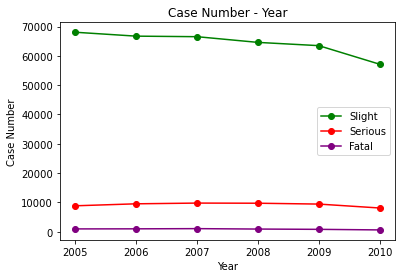

In [24]:
plt.plot(YEAR,YEAR_Slight, color = 'green', marker = 'o', label = 'Slight')
plt.plot(YEAR,YEAR_Serious, color = 'red', marker = 'o', label = 'Serious')
plt.plot(YEAR,YEAR_Fatal, color = 'purple', marker = 'o', label = 'Fatal')
plt.title("Case Number - Year")
plt.xlabel("Year")
plt.ylabel("Case Number")
plt.legend(Acci_Seve)
plt.show()

严重事故比例的逐年变化情况：

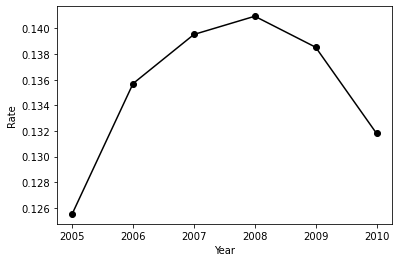

In [25]:
YEAR_Rate = np.zeros(len(YEAR))
for i in range(len(YEAR)):
    YEAR_Rate[i]=(YEAR_Fatal[i]+YEAR_Serious[i])/(YEAR_Slight[i]+YEAR_Fatal[i]+YEAR_Serious[i])
plt.plot(YEAR,YEAR_Rate, color = 'black', marker = 'o')
plt.xlabel("Year")
plt.ylabel("Rate")
plt.show()

显而易见，在这六年内英国每年的车祸总数逐年下降，其中轻微事故下降得最多，直接从每年$70000$起降到每年$60000$起。此外，严重事故、致命事故的总数远小于轻微事故，但随年份变化不大。但从另一个方面看，严重事故所占的比例也在逐渐增大。但是，严重事故的比例经历了先增大后减小的过程，并在$2008$年达到顶峰。

接着，我们再来研究一下每个月的日均事故数量。

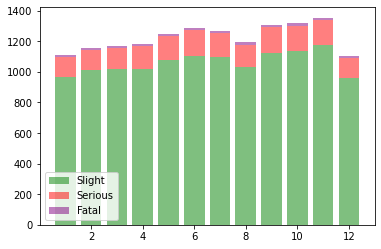

In [26]:
def getMonth(s):
    n = int(s[3])*10+int(s[4])
    return n
MONTH = np.arange(1,13)
MONTH_Daynumber = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
MONTH_Serious = np.zeros(len(MONTH))
MONTH_Slight = np.zeros(len(MONTH))
MONTH_Fatal = np.zeros(len(MONTH))
for i in range(len(Data5)):
    if (Data5['Accident_Severity'][i]=='Slight'):
        MONTH_Slight[getMonth(Data5['Date'][i])-1]+=1
    elif (Data5['Accident_Severity'][i]=='Serious'):
        MONTH_Serious[getMonth(Data5['Date'][i])-1]+=1
    else:
        MONTH_Fatal[getMonth(Data5['Date'][i])-1]+=1
for i in range(len(MONTH)):
    MONTH_Serious[i]=MONTH_Serious[i]/MONTH_Daynumber[i]
    MONTH_Slight[i]=MONTH_Slight[i]/MONTH_Daynumber[i]
    MONTH_Fatal[i]=MONTH_Fatal[i]/MONTH_Daynumber[i]
plt.bar(MONTH,MONTH_Slight,color = 'green',alpha = 0.5,label = 'Slight')
plt.bar(MONTH,MONTH_Serious,bottom = MONTH_Slight,color = 'red',alpha = 0.5,label = 'Serious')
plt.bar(MONTH,MONTH_Fatal,bottom = MONTH_Slight+MONTH_Serious,color = 'purple',alpha = 0.5,label = 'Fatal')
plt.legend()
plt.show()

每个月的严重事故比例：

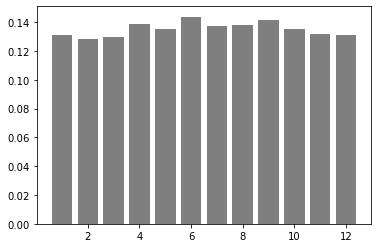

In [27]:
MONTH_Rate = np.zeros(len(MONTH))
for i in range(len(MONTH)):
    MONTH_Rate[i]=(MONTH_Fatal[i]+MONTH_Serious[i])/(MONTH_Slight[i]+MONTH_Fatal[i]+MONTH_Serious[i])
plt.bar(MONTH,MONTH_Rate,color = 'black',alpha = 0.5)
plt.show()

除了十二月日均事故总数较小，其余月份差异并不明显。严重事故的比例与月份的关系也不大。

接着我们来看一看英国的交通事故一般发生在周几：

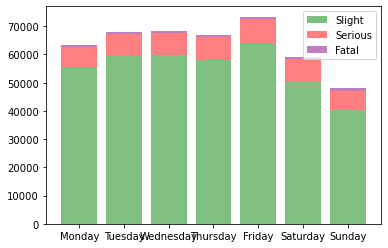

In [28]:
def getWeek(s,WEEK):
    for i in range(len(WEEK)):
        if s == WEEK[i]:
            return i
WEEK = np.array(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
WEEK_Serious = np.zeros(len(WEEK))
WEEK_Slight = np.zeros(len(WEEK))
WEEK_Fatal = np.zeros(len(WEEK))
for i in range(len(Data5)):
    if (Data5['Accident_Severity'][i]=='Slight'):
        WEEK_Slight[getWeek(Data5['Day_of_Week'][i],WEEK)]+=1
    elif (Data5['Accident_Severity'][i]=='Serious'):
        WEEK_Serious[getWeek(Data5['Day_of_Week'][i],WEEK)]+=1
    else:
        WEEK_Fatal[getWeek(Data5['Day_of_Week'][i],WEEK)]+=1
plt.bar(WEEK,WEEK_Slight,color = 'green',alpha = 0.5,label = 'Slight')
plt.bar(WEEK,WEEK_Serious,bottom = WEEK_Slight,color = 'red',alpha = 0.5,label = 'Serious')
plt.bar(WEEK,WEEK_Fatal,bottom = WEEK_Slight+WEEK_Serious,color = 'purple',alpha = 0.5,label = 'Fatal')
plt.legend()
plt.show()

每天的严重事故比例：

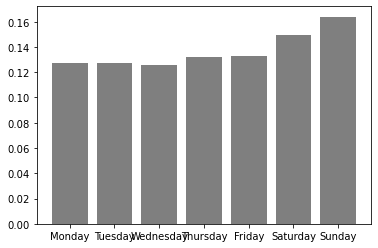

In [29]:
WEEK_Rate = np.zeros(len(WEEK))
for i in range(len(WEEK)):
    WEEK_Rate[i]=(WEEK_Fatal[i]+WEEK_Serious[i])/(WEEK_Slight[i]+WEEK_Fatal[i]+WEEK_Serious[i])
plt.bar(WEEK,WEEK_Rate,color = 'black',alpha = 0.5)
plt.show()

由此可见，在英国，周五的车祸数目高于其它时候，而周末的车祸数目较少。通过查资料(http://news.sina.com.cn/w/2007-04-05/002811568485s.shtml) ，本人发现这种现象的原因是周五晚上大家都急着回家，开车时也都在考虑周末该怎么享受，注意力不集中，导致周五的车祸次数较多。但是周末发生严重车祸的比例略大。

最后我们来研究一天之内各个时段的车祸数目：

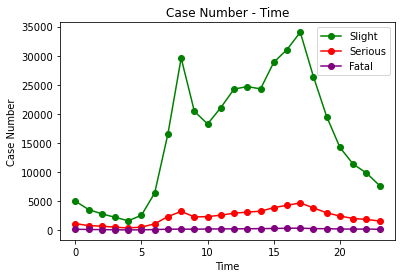

In [30]:
def getTime(s):
    n = int(s[0])*10+int(s[1])
    return n
TIME = np.arange(0,24)
TIME_Serious = np.zeros(len(TIME))
TIME_Slight = np.zeros(len(TIME))
TIME_Fatal = np.zeros(len(TIME))
for i in range(len(Data5)):
    if (Data5['Accident_Severity'][i]=='Slight'):
        TIME_Slight[getTime(Data5['Time'][i])]+=1
    elif (Data5['Accident_Severity'][i]=='Serious'):
        TIME_Serious[getTime(Data5['Time'][i])]+=1
    else:
        TIME_Fatal[getTime(Data5['Time'][i])]+=1
plt.plot(TIME,TIME_Slight, color = 'green', marker = 'o', label = 'Slight')
plt.plot(TIME,TIME_Serious, color = 'red', marker = 'o', label = 'Serious')
plt.plot(TIME,TIME_Fatal, color = 'purple', marker = 'o', label = 'Fatal')
plt.title("Case Number - Time")
plt.xlabel("Time")
plt.ylabel("Case Number")
plt.legend(Acci_Seve)
plt.show()

各个时间段严重事故的比例：

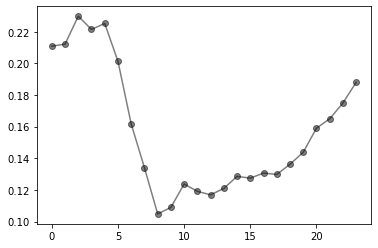

In [31]:
TIME_Rate = np.zeros(len(TIME))
for i in range(len(TIME)):
    TIME_Rate[i]=(TIME_Fatal[i]+TIME_Serious[i])/(TIME_Slight[i]+TIME_Fatal[i]+TIME_Serious[i])
plt.plot(TIME,TIME_Rate,color = 'black',marker = 'o',alpha = 0.5)
plt.show()

不出预料，无论是轻微事故还是严重事故，都在七点和十八点这样的上下班高峰发生得最多，而在零点到五点，由于大部分人都在睡觉，所以车祸发生较少。但当天黑以后，由于司机容易看不清路，发生严重事故的可能性高于白天。

除此之外，在正式建模前，我们还要进一步分析诸如“道路分类”等定性变量与车祸严重等级之间的关系。我们不仅要反应某个特征取值下车祸的数量，还要体现其中严重事故的占比。所以，这部分内容我们用气泡图进行可视化。其中，横坐标是某个特征的各个取值，纵坐标为该取值下的事故数量，点的半径表示此时严重事故发生的概率。

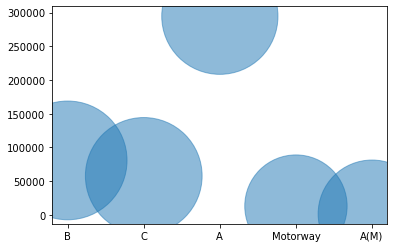

In [32]:
One_Rd_Cl_Number = np.zeros(len(One_Rd_Cl))
One_Rd_Cl_Severe_Number = np.zeros(len(One_Rd_Cl))
for i in range(len(Data5)):
    One_Rd_Cl_Number[getWeek(Data5['1st_Road_Class'][i],One_Rd_Cl)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        One_Rd_Cl_Severe_Number[getWeek(Data5['1st_Road_Class'][i],One_Rd_Cl)]+=1
for i in range(len(One_Rd_Cl)):
    One_Rd_Cl_Severe_Number[i]=(One_Rd_Cl_Severe_Number[i]/One_Rd_Cl_Number[i])*100000
plt.scatter(One_Rd_Cl, One_Rd_Cl_Number, s=One_Rd_Cl_Severe_Number, alpha=0.5)
plt.show()

上图中，A类道路的事故率远大于其它道路类型，但五个圆的半径看上去差别不大。那究竟在哪一类道路上发生严重事故的可能性更高呢？我们不妨直接来看数据。

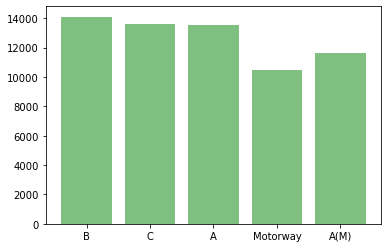

[14102.64354853 13624.15293159 13507.64894647 10479.43613973
 11617.31207289]


In [33]:
plt.bar(One_Rd_Cl,One_Rd_Cl_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(One_Rd_Cl_Severe_Number)

可见，在B类道路上发生重大事故的可能性比其他类型道路高一些，而A类道路上发生的严重车祸反而不多。维基百科上说，在英国，A类道路是重要干线，而B类道路是不太重要的次干线。本人推测，A类道路交通事故数量多可能单纯只是A类道路数量多，而B类道路由于不那么重要，相对狭窄，更容易发生交通事故。

接着，我们探索道路危险因素对事故严重程度的影响。这里，我们综合考虑Carriageway_Hazards和Special_Conditions_at_Site两个特征。

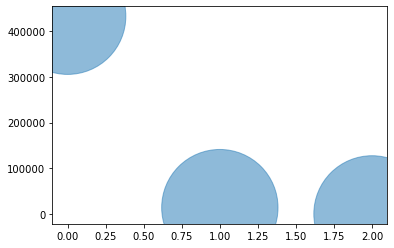

In [34]:
Haza_Sc = np.zeros(3)
Haza_Seve_Sc = np.zeros(3)
for i in range(len(Data5)):
    if (Data5['Carriageway_Hazards'][i]!='None')&(Data5['Special_Conditions_at_Site'][i]!='None'):
        Haza_Sc[2]+=1
        if Data5['Accident_Severity'][i]!='Slight':
            Haza_Seve_Sc[2]+=1
    elif (Data5['Carriageway_Hazards'][i]=='None')&(Data5['Special_Conditions_at_Site'][i]=='None'):
        Haza_Sc[0]+=1
        if Data5['Accident_Severity'][i]!='Slight':
            Haza_Seve_Sc[0]+=1
    else:
        Haza_Sc[1]+=1
        if Data5['Accident_Severity'][i]!='Slight':
            Haza_Seve_Sc[1]+=1
for i in range(3):
    Haza_Seve_Sc[i]=(Haza_Seve_Sc[i]/Haza_Sc[i])*100000
plt.scatter([0,1,2], Haza_Sc, s=Haza_Seve_Sc, alpha=0.5)
plt.show()

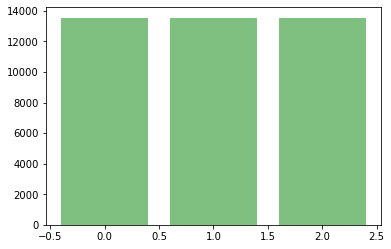

[13537.02191071 13537.08743284 13553.71900826]


In [35]:
plt.bar([0,1,2],Haza_Seve_Sc,color = 'green',alpha = 0.5)
plt.show()
print(Haza_Seve_Sc)

我们发现，其实大部分车祸都发生在没有路面危险因素的情况下，且有无路面危险因素对严重事故的发生率的影响也微乎其微。建模时如果发生过拟合，可以把这个因素删掉。

下一个研究的特征是路面控制车辆的设施。

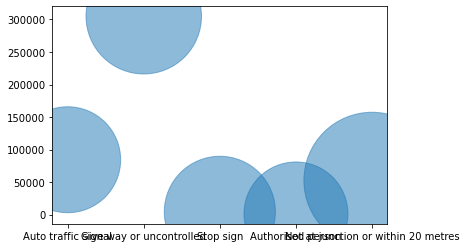

In [36]:
Jc_Ct_Number = np.zeros(len(Jc_Ct))
Jc_Ct_Severe_Number = np.zeros(len(Jc_Ct))
for i in range(len(Data5)):
    Jc_Ct_Number[getWeek(Data5['Junction_Control'][i],Jc_Ct)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        Jc_Ct_Severe_Number[getWeek(Data5['Junction_Control'][i],Jc_Ct)]+=1
for i in range(len(Jc_Ct)):
    Jc_Ct_Severe_Number[i]=(Jc_Ct_Severe_Number[i]/Jc_Ct_Number[i])*100000
plt.scatter(Jc_Ct, Jc_Ct_Number, s=Jc_Ct_Severe_Number, alpha=0.5)
plt.show()

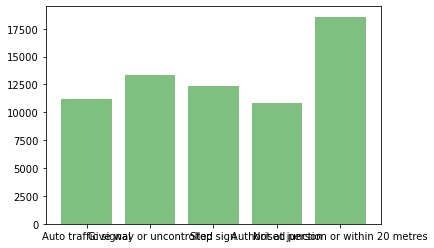

[11227.30883696 13333.33333333 12346.84260132 10805.50098232
 18575.3977316 ]
['Auto traffic signal', 'Give way or uncontrolled', 'Stop sign', 'Authorised person', 'Not at junction or within 20 metres']


In [37]:
plt.bar(Jc_Ct,Jc_Ct_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(Jc_Ct_Severe_Number)
print(Jc_Ct)

当路口完全没有红绿灯或者其它指挥车辆的设施时，车祸的绝对数量多，且严重车祸的比例也较大；有红绿灯或者专人指挥时效果最好，仅有停车指示牌时次之。然而，当车祸没有发生在路口时严重车祸的比率远大于其他情况。究其原因，可能是路口的空间更大一些，发生车祸也不会撞到路边的建筑物之类的。

下面研究路口类型：

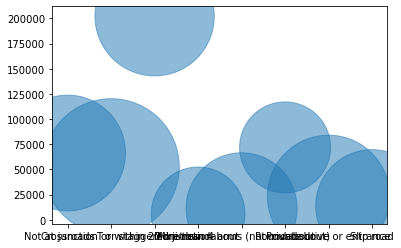

In [38]:
Jc_De_Number = np.zeros(len(Jc_De))
Jc_De_Severe_Number = np.zeros(len(Jc_De))
for i in range(len(Data5)):
    Jc_De_Number[getWeek(Data5['Junction_Detail'][i],Jc_De)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        Jc_De_Severe_Number[getWeek(Data5['Junction_Detail'][i],Jc_De)]+=1
for i in range(len(Jc_De)):
    Jc_De_Severe_Number[i]=(Jc_De_Severe_Number[i]/Jc_De_Number[i])*100000
plt.scatter(Jc_De, Jc_De_Number, s=Jc_De_Severe_Number, alpha=0.5)
plt.show()

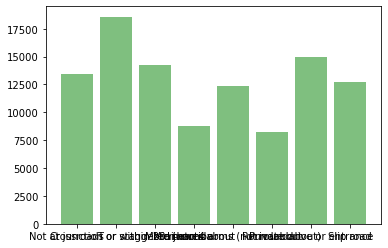

[13406.44752523 18573.03135756 14236.57680753  8802.877205
 12350.77247191  8277.33956568 14964.81894628 12696.44935972]
['Crossroads', 'Not at junction or within 20 metres', 'T or staggered junction', 'Mini-roundabout', 'More than 4 arms (not roundabout)', 'Roundabout', 'Private drive or entrance', 'Slip road']


In [39]:
plt.bar(Jc_De,Jc_De_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(Jc_De_Severe_Number)
print(Jc_De)

我们发现，丁字路口或者交错路口的事故发生数量最大。但在有路口的情况下，发生在环岛的严重事故比率较低。究其原因，可能是环岛上的所有车辆都朝着一个方向，只能追尾，不能迎头相撞。

光照条件：

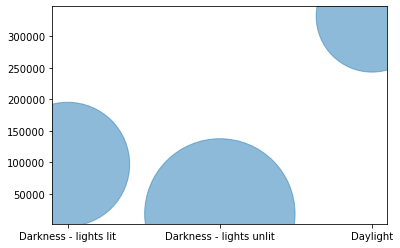

In [40]:
Lit_Condi_Number = np.zeros(len(Lit_Condi))
Lit_Condi_Severe_Number = np.zeros(len(Lit_Condi))
for i in range(len(Data5)):
    Lit_Condi_Number[getWeek(Data5['Light_Conditions'][i],Lit_Condi)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        Lit_Condi_Severe_Number[getWeek(Data5['Light_Conditions'][i],Lit_Condi)]+=1
for i in range(len(Lit_Condi)):
    Lit_Condi_Severe_Number[i]=(Lit_Condi_Severe_Number[i]/Lit_Condi_Number[i])*100000
plt.scatter(Lit_Condi, Lit_Condi_Number, s=Lit_Condi_Severe_Number, alpha=0.5)
plt.show()

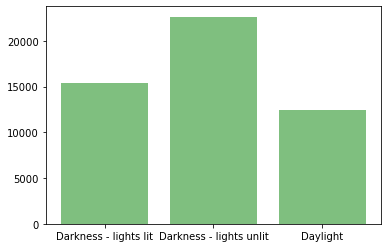

[15376.61749416 22633.16799655 12488.76014604]
['Darkness - lights lit', 'Darkness - lights unlit', 'Daylight']


In [41]:
plt.bar(Lit_Condi,Lit_Condi_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(Lit_Condi_Severe_Number)
print(Lit_Condi)

光照这个特征的可视化结果在预料之中。光照时间充足下的车祸数量最多是因为大多数车祸发生在白天，但光照条件越差，严重车祸的发生率就越高。

路面情况：

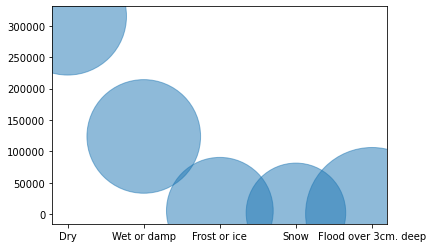

In [42]:
R_S_Condi_Number = np.zeros(len(R_S_Condi))
R_S_Condi_Severe_Number = np.zeros(len(R_S_Condi))
for i in range(len(Data5)):
    R_S_Condi_Number[getWeek(Data5['Road_Surface_Conditions'][i],R_S_Condi)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        R_S_Condi_Severe_Number[getWeek(Data5['Road_Surface_Conditions'][i],R_S_Condi)]+=1
for i in range(len(R_S_Condi)):
    R_S_Condi_Severe_Number[i]=(R_S_Condi_Severe_Number[i]/R_S_Condi_Number[i])*100000
plt.scatter(R_S_Condi, R_S_Condi_Number, s=R_S_Condi_Severe_Number, alpha=0.5)
plt.show()

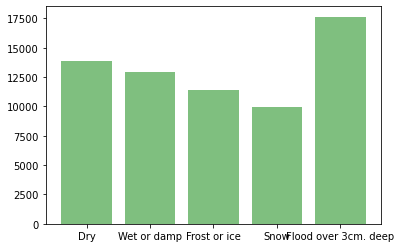

[13837.88824013 12912.18551174 11390.77714496  9913.37824832
 17647.05882353]
['Dry', 'Wet or damp', 'Frost or ice', 'Snow', 'Flood over 3cm. deep']


In [43]:
plt.bar(R_S_Condi,R_S_Condi_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(R_S_Condi_Severe_Number)
print(R_S_Condi)

由于天气以晴天和雨天为主，所以晴天雨天车祸数量最多；但就严重车祸率来看，洪水、积水造成的影响更大。

事故发生的路段的类型：

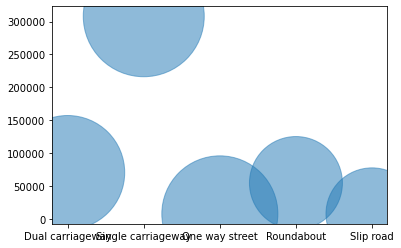

In [44]:
Rd_Tp_Number = np.zeros(len(Rd_Tp))
Rd_Tp_Severe_Number = np.zeros(len(Rd_Tp))
for i in range(len(Data5)):
    Rd_Tp_Number[getWeek(Data5['Road_Type'][i],Rd_Tp)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        Rd_Tp_Severe_Number[getWeek(Data5['Road_Type'][i],Rd_Tp)]+=1
for i in range(len(Rd_Tp)):
    Rd_Tp_Severe_Number[i]=(Rd_Tp_Severe_Number[i]/Rd_Tp_Number[i])*100000
plt.scatter(Rd_Tp, Rd_Tp_Number, s=Rd_Tp_Severe_Number, alpha=0.5)
plt.show()

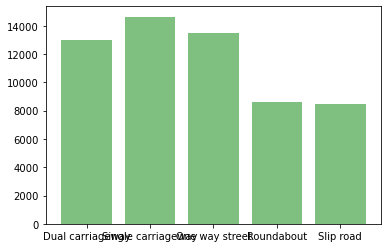

[13015.05462107 14638.64378608 13472.56347256  8643.8179473
  8487.18655277]
['Dual carriageway', 'Single carriageway', 'One way street', 'Roundabout', 'Slip road']


In [45]:
plt.bar(Rd_Tp,Rd_Tp_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(Rd_Tp_Severe_Number)
print(Rd_Tp)

我们发现，当路段只有一个车道，事故次数和严重事故比例都会显著增加，因为这种情况下路面往往更窄。

事故是发生在城市还是发生在农村：

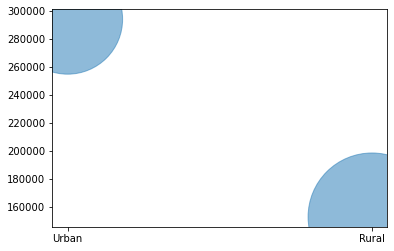

In [46]:
Urb_Rur_Number = np.zeros(len(Urb_Rur))
Urb_Rur_Severe_Number = np.zeros(len(Urb_Rur))
for i in range(len(Data5)):
    Urb_Rur_Number[getWeek(Data5['Urban_or_Rural_Area'][i],Urb_Rur)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        Urb_Rur_Severe_Number[getWeek(Data5['Urban_or_Rural_Area'][i],Urb_Rur)]+=1
for i in range(len(Urb_Rur)):
    Urb_Rur_Severe_Number[i]=(Urb_Rur_Severe_Number[i]/Urb_Rur_Number[i])*100000
plt.scatter(Urb_Rur, Urb_Rur_Number, s=Urb_Rur_Severe_Number, alpha=0.5)
plt.show()

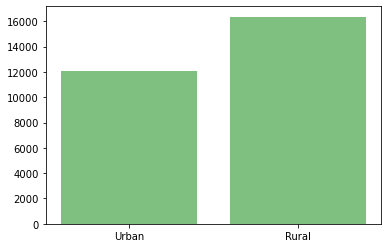

[12070.77059043 16358.09533775]
['Urban', 'Rural']


In [47]:
plt.bar(Urb_Rur,Urb_Rur_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(Urb_Rur_Severe_Number)
print(Urb_Rur)

尽管城市里的车祸数量多，但农村地区的严重车祸比率更大。可能的原因是农村地区交通设施、管理人员更少且路况更差。

天气情况：

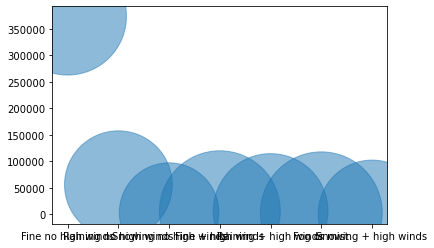

In [48]:
Wet_Condi_Number = np.zeros(len(Wet_Condi))
Wet_Condi_Severe_Number = np.zeros(len(Wet_Condi))
for i in range(len(Data5)):
    Wet_Condi_Number[getWeek(Data5['Weather_Conditions'][i],Wet_Condi)]+=1
    if Data5['Accident_Severity'][i]!='Slight':
        Wet_Condi_Severe_Number[getWeek(Data5['Weather_Conditions'][i],Wet_Condi)]+=1
for i in range(len(Wet_Condi)):
    Wet_Condi_Severe_Number[i]=(Wet_Condi_Severe_Number[i]/Wet_Condi_Number[i])*100000
plt.scatter(Wet_Condi, Wet_Condi_Number, s=Wet_Condi_Severe_Number, alpha=0.5)
plt.show()

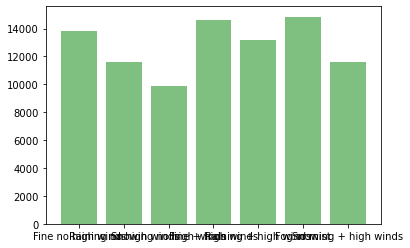

[13836.9789815  11598.99389148  9910.22099448 14609.38916078
 13151.73796791 14846.81853888 11586.90176322]
['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Fog or mist', 'Snowing + high winds']


In [49]:
plt.bar(Wet_Condi,Wet_Condi_Severe_Number,color = 'green',alpha = 0.5)
plt.show()
print(Wet_Condi_Severe_Number)
print(Wet_Condi)

我们发现，雨雪天气发生严重事故的比例反而比较小，可能下雨下雪的时候大家开车反而更小心了。相同条件下，有风会使发生严重事故的概率略微增大。不过，由于大雾会影响视线，所以雾霾天发生严重事故的比例最大。
## III.数据建模
有了上面这些信息以后，我们就可以建立车祸严重程度的预测模型了。由于有些变量与车祸严重程度关系不大且部分变量之间存在多重共线性，我们仍需要对数据集作一些调整。此后，我们在新的数据集上划分训练集和测试集并在训练集上分别建立线性回归模型和机器学习模型，再在测试集上比较它们的准确性。

现在我们来进一步处理数据集。首先，日期中只有“星期几”与严重事故的比例有关，所以删除日期这一列，并把“星期几”量化。量化时，星期几的严重车祸比例越高，其所对应的数字就应该越大。所以，我们直接用刚刚得到的“每一天的严重车祸比例”来代替“星期几”。对其它需要量化的自变量，也遵循同样的原则。像经纬度、年份等无关的变量，也直接删除。至于时间，则是六点到十八点设为零，其余时段设为一。

In [50]:
Data6 = Data5.drop(labels=['Date','Year','Longitude','Latitude'], axis = 1)
Data6.head()

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,B,Slight,None,Wednesday,1.0,Auto traffic signal,Crossroads,Darkness - lights lit,1,1,0.0,5.0,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds
1,C,Slight,None,Thursday,1.0,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,1,2,0.0,0.0,Dry,Single carriageway,None,30,20:40,Urban,Fine no high winds
2,A,Slight,None,Saturday,1.0,Auto traffic signal,Crossroads,Darkness - lights lit,2,2,0.0,5.0,Dry,Single carriageway,None,30,22:43,Urban,Fine no high winds
3,A,Slight,None,Sunday,1.0,Auto traffic signal,Crossroads,Darkness - lights lit,1,1,0.0,5.0,Dry,Single carriageway,None,30,00:42,Urban,Fine no high winds
4,A,Slight,None,Tuesday,1.0,Auto traffic signal,Crossroads,Darkness - lights lit,1,2,0.0,5.0,Wet or damp,Single carriageway,None,30,20:48,Urban,Fine no high winds


In [51]:
for i in range(len(Data6)):
    if Data6['Accident_Severity'][i]=='Slight':
        Data6['Accident_Severity'][i]=1
    elif Data6['Accident_Severity'][i]=='Serious':
        Data6['Accident_Severity'][i]=2
    else:
        Data6['Accident_Severity'][i]=3
    if Data6['Carriageway_Hazards'][i]!='None':
        Data6['Carriageway_Hazards'][i]=1
    else:
        Data6['Carriageway_Hazards'][i]=0
    if Data6['Special_Conditions_at_Site'][i]!='None':
        Data6['Special_Conditions_at_Site'][i]=1
    else:
        Data6['Special_Conditions_at_Site'][i]=0
    if (getTime(Data6['Time'][i])>=6)&(getTime(Data6['Time'][i])<=18):
        Data6['Time'][i]=1
    else:
        Data6['Time'][i]=0
    Data6['1st_Road_Class'][i]=One_Rd_Cl_Severe_Number[getWeek(Data5['1st_Road_Class'][i],One_Rd_Cl)]/1000
    Data6['Day_of_Week'][i]=WEEK_Rate[getWeek(Data5['Day_of_Week'][i],WEEK)]
    Data6['Junction_Control'][i]=Jc_Ct_Severe_Number[getWeek(Data5['Junction_Control'][i],Jc_Ct)]/1000
    Data6['Junction_Detail'][i]=Jc_De_Severe_Number[getWeek(Data5['Junction_Detail'][i],Jc_De)]/1000
    Data6['Light_Conditions'][i]=Lit_Condi_Severe_Number[getWeek(Data5['Light_Conditions'][i],Lit_Condi)]/1000
    Data6['Road_Surface_Conditions'][i]=R_S_Condi_Severe_Number[getWeek(Data5['Road_Surface_Conditions'][i],R_S_Condi)]/1000
    Data6['Road_Type'][i]=Rd_Tp_Severe_Number[getWeek(Data5['Road_Type'][i],Rd_Tp)]/1000
    Data6['Urban_or_Rural_Area'][i]=Urb_Rur_Severe_Number[getWeek(Data5['Urban_or_Rural_Area'][i],Urb_Rur)]/1000
    Data6['Weather_Conditions'][i]=Urb_Rur_Severe_Number[getWeek(Data5['Weather_Conditions'][i],Urb_Rur)]/1000
Data6.head()

/tmp/ipykernel_2544237/797647132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data6['Accident_Severity'][i]=1
/tmp/ipykernel_2544237/797647132.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data6['Carriageway_Hazards'][i]=0
/tmp/ipykernel_2544237/797647132.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data6['Special_Conditions_at_Site'][i]=0
/tmp/ipykernel_2544237/797647132.py:17: SettingWithCopyWarning: 
A value is

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,14.102644,1,0,0.125535,1.0,11.227309,13.406448,15.376617,1,1,0.0,5.0,13.837888,13.015055,0,30,1,12.070771,"[[12.070770590434753, 16.3580953377499]]"
1,13.624153,1,0,0.131688,1.0,13.333333,14.236577,15.376617,1,2,0.0,0.0,13.837888,14.638644,0,30,0,12.070771,"[[12.070770590434753, 16.3580953377499]]"
2,13.507649,1,0,0.149085,1.0,11.227309,13.406448,15.376617,2,2,0.0,5.0,13.837888,14.638644,0,30,0,12.070771,"[[12.070770590434753, 16.3580953377499]]"
3,13.507649,1,0,0.163922,1.0,11.227309,13.406448,15.376617,1,1,0.0,5.0,13.837888,14.638644,0,30,0,12.070771,"[[12.070770590434753, 16.3580953377499]]"
4,13.507649,1,0,0.127321,1.0,11.227309,13.406448,15.376617,1,2,0.0,5.0,12.912186,14.638644,0,30,0,12.070771,"[[12.070770590434753, 16.3580953377499]]"


In [52]:
for i in range(len(Data6)):
    Data6['Weather_Conditions'][i]=Wet_Condi_Severe_Number[getWeek(Data5['Weather_Conditions'][i],Wet_Condi)]/1000
Data7 = Data6.drop(labels=['Special_Conditions_at_Site'], axis = 1)

/tmp/ipykernel_2544237/1164889338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data6['Weather_Conditions'][i]=Wet_Condi_Severe_Number[getWeek(Data5['Weather_Conditions'][i],Wet_Condi)]/1000


In [53]:
Data7.head()

,1st_Road_Class,Accident_Severity,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions
0,14.102644,1,0,0.125535,1.0,11.227309,13.406448,15.376617,1,1,0.0,5.0,13.837888,13.015055,30,1,12.070771,13.836979
1,13.624153,1,0,0.131688,1.0,13.333333,14.236577,15.376617,1,2,0.0,0.0,13.837888,14.638644,30,0,12.070771,13.836979
2,13.507649,1,0,0.149085,1.0,11.227309,13.406448,15.376617,2,2,0.0,5.0,13.837888,14.638644,30,0,12.070771,13.836979
3,13.507649,1,0,0.163922,1.0,11.227309,13.406448,15.376617,1,1,0.0,5.0,13.837888,14.638644,30,0,12.070771,13.836979
4,13.507649,1,0,0.127321,1.0,11.227309,13.406448,15.376617,1,2,0.0,5.0,12.912186,14.638644,30,0,12.070771,13.836979


我们对所有自变量和因变量进行中心化和标准化：

In [54]:
center = preprocessing.scale(Data7, with_mean = True, with_std=True)
print(type(center))

<class 'numpy.ndarray'>


先建立一个线性回归模型。建立完以后，看看变量之间是否存在多重共线性，以及各个变量起到的作用是否显著：

In [55]:
CENTRE = pd.DataFrame(center,columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r'])
CENTRE.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r
0,0.969835,-0.381218,-0.107364,-0.802682,-0.47507,-1.147914,-0.045857,0.824144,-0.457154,-1.397705,-0.076913,1.899344,0.544603,-0.254729,-0.656954,0.528347,-0.720946,0.369923
1,0.149362,-0.381218,-0.107364,-0.300537,-0.47507,-0.101243,0.245624,0.824144,-0.457154,0.131776,-0.076913,-0.502763,0.544603,0.537573,-0.656954,-1.892695,-0.720946,0.369923
2,-0.050408,-0.381218,-0.107364,1.119249,-0.47507,-1.147914,-0.045857,0.824144,0.753971,0.131776,-0.076913,1.899344,0.544603,0.537573,-0.656954,-1.892695,-0.720946,0.369923
3,-0.050408,-0.381218,-0.107364,2.330121,-0.47507,-1.147914,-0.045857,0.824144,-0.457154,-1.397705,-0.076913,1.899344,0.544603,0.537573,-0.656954,-1.892695,-0.720946,0.369923
4,-0.050408,-0.381218,-0.107364,-0.656880,-0.47507,-1.147914,-0.045857,0.824144,-0.457154,0.131776,-0.076913,1.899344,-1.131164,0.537573,-0.656954,-1.892695,-0.720946,0.369923


In [56]:
model4 = ols("b~a  + c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r",CENTRE).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     1198.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:52:04   Log-Likelihood:            -6.2445e+05
No. Observations:              447099   AIC:                         1.249e+06
Df Residuals:                  447081   BIC:                         1.249e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.956e-16      0.001  -4.76e-13      1.000      -0.003       0.003
a              0.0338      0.002     20.948      0.000       0.031       0.037
c             -0.0052      0.001     -3.550      0.000      -0.008      -0.002
d              0.0177      0.001     11.964      0.000       0.015       0.021
e             -0.0933      0.001    -62.481      0.000      -0.096      -0.090
f              0.0197      0.002      8.782      0.000       0.015       0.024
g              0.0416      0.003     15.195      0.000       0.036       0.047
h              0.0280      0.002     15.941      0.000       0.025       0.031
i              0.0819      0.002     53.772      0.000       0.079       0.085
j             -0.0979      0.002    -64.168      0.000      -0.101      -0.095
k             -0.0028      0.001     -1.884      0.060      -0.006       0.000
l              0.0230      0.002     14.305      0.000       0.020       0.026
m              0.0284      0.002     16.330      0.000       0.025       0.032
n              0.0238      0.002     10.488      0.000       0.019       0.028
o              0.0482      0.002     22.241      0.000       0.044       0.052
p             -0.0298      0.002    -17.242      0.000      -0.033      -0.026
q              0.0282      0.002     13.879      0.000       0.024       0.032
r              0.0190      0.002     11.056      0.000       0.016       0.022
==============================================================================
Omnibus:                   215947.653   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1037734.558
Skew:                           2.418   Prob(JB):                         0.00
Kurtosis:                       8.685   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

在显著性水平$\alpha = 0.05$下，我们认为特征$k$（即Pedestrian_Crossing-Human_Control）作用不显著。我们先将其删除，并检查变量之间是否存在多重共线性。

<AxesSubplot:>

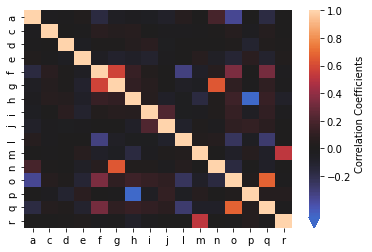

In [57]:
X=CENTRE.drop(labels=['k','b'], axis = 1)
Y = CENTRE['b']
pcorr = X.corr(method = 'pearson')
tick_ = (np.arange(0,13,2)-2)/10
dict_ = {"orientation":'vertical',
         'label':'Correlation Coefficients',
         "drawedges":False,
         "ticklocation":"top",
         "extend":"min",
        "filled":True,
         "alpha":0.8,
         "cmap":"cmap",
         "ticks":tick_}
sns.heatmap(pcorr,cbar_kws= dict_,center=0)

在这张热力图上，颜色越浅的特征之间相关性越强。所以，我们可以定性地认为现有的自变量之间不存在多重共线性。

接着，我们就可以将原来的数据集划分为训练集和测试集并开始建模了。由于等一下还要用机器学习建立分类模型，我们先设立另一个Y，并将其中的Fatal改为Serious，便于分类。

In [58]:
Y_=Y.to_numpy()
for i in range(len(Y_)):
    if Y_[i]<0:
        Y_[i]=0
    else:
        Y_[i]=1
print(Y_)

[0. 0. 0. ... 1. 0. 1.]


先建立线性回归模型：

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,shuffle=True) 
model = Pipeline([('Poly',PolynomialFeatures(degree=1)),('Linear',LinearRegression())])
model.fit(x_train,y_train)
print(model.named_steps['Linear'].coef_)
print(model.named_steps['Linear'].intercept_)

[ 0.          0.01137255 -0.00147643  0.00559274 -0.03317561  0.00547222
  0.01377729  0.00686069  0.02525673 -0.03478323  0.00779987  0.01004177
  0.00832127  0.01384702 -0.01015686  0.00922011  0.00579893]
0.13541567543640207


在测试集上运行这个模型：

In [60]:
y_predict = model.predict(x_test)
print(y_predict)

[0.13597954 0.19390126 0.09374842 ... 0.16740511 0.14620593 0.21493313]


用均方误差准则评价模型的正确性：

In [61]:
rmse = np.sqrt(np.mean((y_predict-y_test)**2))
print("The RMSE value is", round(rmse,4))

The RMSE value is 0.335


我们发现，线性回归模型的准确性还不是特别高。究其原因，是因为实际上因变量的可能取值只有三个，而经过拟合后在测试集上得到的预测值很可能在这三个值以外。实际上，这对我们的预测也造成了麻烦。所以，我们应该建立分类模型。下面，我们就用逻辑斯蒂回归模型重新建模。

In [62]:
x_train_ml,x_test_ml,y_train_ml,y_test_ml = train_test_split(X,Y_,test_size=0.2,shuffle=True) 
logreg = LogisticRegression()
logreg.fit(x_train_ml, y_train_ml)
Y_pred = logreg.predict(x_test_ml)
print("The accuracy rate is: %2.3f" % accuracy_score(y_test_ml, Y_pred))

The accuracy rate is: 0.864


朴素贝叶斯：

In [64]:
clf_1 = GaussianNB()
clf_1.fit(x_train_ml, y_train_ml)
Y_pred_bys = clf_1.predict(x_test_ml)
print("The accuracy rate is: %2.3f" % accuracy_score(y_test_ml, Y_pred_bys))

The accuracy rate is: 0.808


K近邻：

In [65]:
clf_2 = KNeighborsClassifier()
clf_2.fit(x_train_ml, y_train_ml)
Y_pred_knn = clf_2.predict(x_test_ml)
print("The accuracy rate is: %2.3f" % accuracy_score(y_test_ml, Y_pred_knn))

The accuracy rate is: 0.849


决策树：

In [67]:
clf_3 = DecisionTreeClassifier()
clf_3.fit(x_train_ml, y_train_ml)
Y_pred_tree = clf_3.predict(x_test_ml)
print("The accuracy rate is: %2.3f" % accuracy_score(y_test_ml, Y_pred_tree))

The accuracy rate is: 0.833


感知机：

In [71]:
clf_4 = Perceptron()
clf_4.fit(x_train_ml, y_train_ml)
Y_pred_pcp = clf_4.predict(x_test_ml)
print("The accuracy rate is: %2.3f" % accuracy_score(y_test_ml, Y_pred_pcp))

The accuracy rate is: 0.849


我们发现，二分类模型的准确率都达到了$80%$以上，但其中逻辑斯蒂回归模型的准确率最高，而朴素贝叶斯模型的准确率显著低于另外四种模型。可能的原因是朴素贝叶斯模型中有条件独立假设，即不同自变量之间相互独立。但即使这个数据集自变量之间的相互依赖程度已经很低，但自变量之间完全独立的情况仍然十分少见，所以绝大部分数据集在一定程度上都不能满足这个假设，导致朴素贝叶斯模型最终的准确率较低。

那么，为什么逻辑斯蒂回归模型的准确率会更高呢？因为感知机、K近邻和决策树模型都完全依赖于训练集中的数据来对未知点进行分类，而逻辑斯蒂回归模型是通过最大化特征条件下某个类别的条件概率来进行分类的，把更多的不确定因素考虑进去，所以在测试集上运行时泛化能力更强。
## IV.结论
- 车祸发生的时间、地点、路况、天气等因素都会对车祸的严重程度产生影响。这些因素可以用来对未知车祸的严重程度进行预测。
- 在所有预测模型中，逻辑斯蒂回归模型的泛化能力最强，准确率最高。